# Correlate topic mixtures from MixEHR with ventilation duration
Here different categories (e.g. physician, nurse) are treated as different data types.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
import seaborn as sns
%matplotlib inline

## Read data

In [2]:
mixtures = pd.read_csv('/home/mcb/li_lab/zwen8/data/mimic/multi_datatypes_d2_phy_nurse_48/infer/train_topics.csv', header=None)
duration = pd.read_csv('/home/mcb/li_lab/zwen8/data/mimic/multi_datatypes_d2_phy_nurse_48/train_vent.txt', header=None, sep=' ')
duration = duration[1].astype(np.float64)

In [3]:
print(duration.shape)
print(mixtures.shape)

(1233,)
(1233, 50)


In [4]:
mixtures.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.874828,1.166569,3.843209,42.545591,2.693996,1.337255,19.222200,2.002621,37.666169,1.463330,...,13.319325,0.653446,8.632088,24.200414,21.773465,0.127713,17.230057,3.153776,0.468445,0.974881
1,3.656715,1.075168,0.926373,6.663112,1.109817,0.518904,5.025716,37.286118,24.236174,0.033883,...,4.302707,0.166163,0.115074,7.701400,4.175704,2.598763,46.150875,1.618016,0.396642,1.870146
2,11.956734,0.176012,0.867737,0.198087,0.278395,1098.765050,0.318293,0.488130,0.474519,0.194941,...,0.269301,0.121346,0.046559,0.146157,7.006986,0.273877,0.104721,0.461965,0.236766,5.951983
3,22.965509,0.337739,3.755310,0.848612,2.065629,7.484619,0.993160,1.329488,0.171434,0.132497,...,0.449810,2.690103,22.210306,0.353250,5.514912,0.585252,0.424625,5.032115,1.864329,49.207310
4,0.590982,0.294801,2.438955,0.271399,0.528974,0.105476,0.534875,0.677712,2.524436,2.335621,...,1.497174,2.331830,1.056511,1.430464,1.246733,1.083379,0.176597,0.330298,10.029276,0.951352


In [5]:
duration.head()

0     46.250000
1    155.716667
2     21.850000
3    299.683333
4    230.000000
Name: 1, dtype: float64

## Normalize

In [6]:
normed_mixtures = pd.DataFrame(normalize(mixtures.iloc[:,2:51], norm='l1', axis=1))

In [7]:
mixtures.sum(axis=1)

0        903.0
1        715.0
2       1176.0
3        604.0
4        484.0
         ...  
1228     800.0
1229     394.0
1230     440.0
1231     485.0
1232    1770.0
Length: 1233, dtype: float64

## See if mixture's rows sum up to 1

In [8]:
normed_mixtures.sum(axis=1)

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1228    1.0
1229    1.0
1230    1.0
1231    1.0
1232    1.0
Length: 1233, dtype: float64

## Heatmap

In [9]:
normed_mixtures.head()

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,0.004266,0.047223,0.002990,0.001484,0.021335,0.002223,0.041807,0.001624,0.075722,0.001383,...,0.014784,0.000725,0.009581,0.026861,0.024167,0.000142,0.019124,0.003500,0.000520,0.001082
1,0.001304,0.009381,0.001563,0.000731,0.007076,0.052496,0.034123,0.000048,0.066812,0.002025,...,0.006058,0.000234,0.000162,0.010843,0.005879,0.003659,0.064977,0.002278,0.000558,0.002633
2,0.000746,0.000170,0.000239,0.944064,0.000273,0.000419,0.000408,0.000167,0.000601,0.000262,...,0.000231,0.000104,0.000040,0.000126,0.006020,0.000235,0.000090,0.000397,0.000203,0.005114
3,0.006467,0.001461,0.003557,0.012889,0.001710,0.002289,0.000295,0.000228,0.001491,0.000435,...,0.000775,0.004633,0.038248,0.000608,0.009497,0.001008,0.000731,0.008666,0.003211,0.084738
4,0.005048,0.000562,0.001095,0.000218,0.001107,0.001403,0.005225,0.004835,0.000608,0.005414,...,0.003099,0.004827,0.002187,0.002961,0.002581,0.002242,0.000366,0.000684,0.020760,0.001969


In [10]:
sorted_normed_mixtures = normed_mixtures.sort_values(by=normed_mixtures.columns[17], ascending=False)

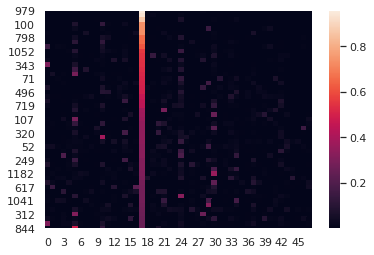

In [11]:
sns.set()
sns.heatmap(sorted_normed_mixtures.head(50))

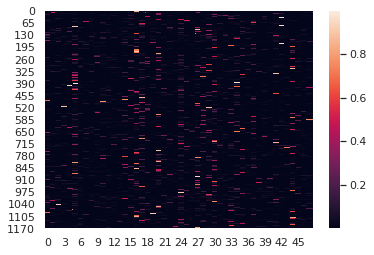

In [12]:
sns.heatmap(normed_mixtures)

## Compute correlation

In [13]:
corr = normed_mixtures.apply(lambda mixture: mixture.corr(duration, method='pearson'))

In [14]:
corr_sorted = corr.sort_values(ascending=False)

Text(0, 0.5, 'Pearson Correlation')

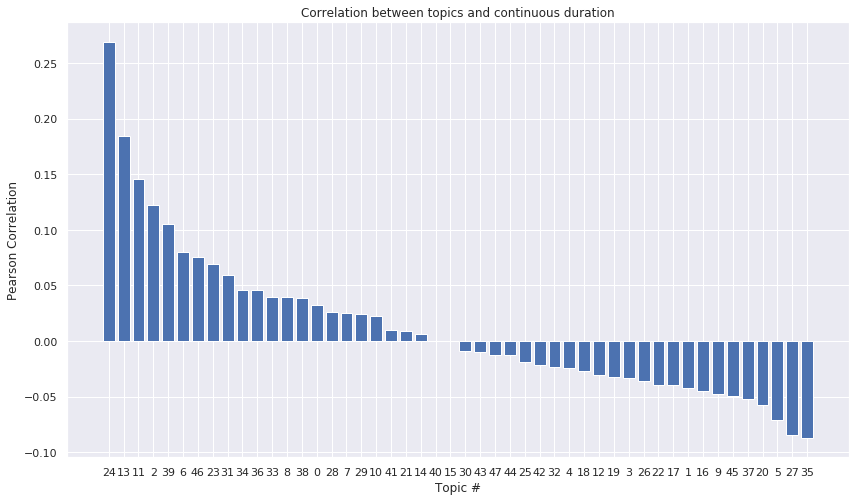

In [15]:
plt.figure(figsize=(14, 8))
plt.bar(x=range(len(corr)), height=corr_sorted)
plt.title('Correlation between topics and continuous duration')
plt.xlabel('Topic #')
plt.xticks(range(len(corr)), corr_sorted.index)
plt.ylabel('Pearson Correlation')

## Select most correlated topics and map back to words

In [16]:
def find_max_n(numbers, n=3):
    sorted_numbers = sorted(numbers, reverse=True)
    return [numbers.index(number) for number in sorted_numbers[0:n]]

In [17]:
top_pos = find_max_n(list(corr), 3)
top_neg = find_max_n(list(-corr), 3)

In [18]:
top_neg

[35, 27, 5]

In [19]:
top_topics = top_pos + top_neg
top_topics

[24, 13, 11, 35, 27, 5]

## Extract top words in those top topics

In [22]:
phis_df = pd.read_csv(r'/home/mcb/li_lab/zwen8/data/mimic/multi_datatypes_all_notes_train_mixehr/data_JCVB0_nmar_K50_iter665_phi_normalized.csv', header=None)

In [29]:
phis_df.columns = ['CATEGORY', 'WORD_ID'] + [str(idx) for idx in range(50)]

In [30]:
phis_df.head()

,CATEGORY,WORD_ID,0,1,2,3,4,5,6,7,...,40,41,42,43,44,45,46,47,48,49
0,1,0,1.076970e-03,1.951260e-05,1.747330e-04,1.249040e-04,6.021280e-04,4.992860e-07,7.688790e-07,0.000150,...,4.138770e-07,3.391540e-07,5.566110e-07,1.513320e-04,7.694040e-05,4.486700e-07,3.422730e-07,3.288750e-07,1.838600e-07,4.634600e-07
1,1,1,1.337990e-07,1.744150e-03,1.063910e-07,2.089110e-07,6.612080e-08,1.527000e-07,2.561460e-07,0.000028,...,2.615580e-05,1.387700e-07,1.708350e-07,1.545740e-07,3.974340e-04,1.889410e-07,9.848960e-08,1.192480e-07,7.695450e-08,1.936870e-07
2,1,2,8.803810e-08,8.935190e-08,7.092210e-08,1.209620e-07,4.507800e-08,1.018750e-07,1.339410e-07,0.000079,...,1.038290e-07,9.309660e-08,1.249770e-07,1.046240e-07,2.028060e-07,1.497650e-07,6.302800e-08,7.906230e-08,5.489960e-08,1.168770e-07
3,1,3,2.257130e-07,3.157620e-04,2.712690e-07,5.930480e-05,1.368390e-07,2.934740e-07,3.711850e-07,0.000064,...,2.777400e-07,2.422290e-07,3.666180e-07,2.515130e-04,2.266730e-07,6.639200e-05,7.242360e-07,2.740430e-07,1.599560e-07,2.506610e-04
4,1,4,2.487830e-07,6.494980e-04,8.275680e-07,4.277990e-07,1.726640e-07,3.231320e-07,4.273990e-07,0.000255,...,8.394710e-06,3.059520e-07,3.813200e-07,6.857790e-05,3.779260e-05,4.646130e-07,1.931730e-04,6.647870e-04,1.670580e-07,3.918100e-07


In [34]:
cols = ['CATEGORY', 'WORD_ID'] + [str(value) for value in top_topics]

In [35]:
top_phis_df = phis_df[cols]

In [63]:
top_phis_df.shape

(21473, 8)

In [42]:
top_phis_df.head()

,CATEGORY,WORD_ID,24,13,11,35,27,5
0,1,0,7.167470e-07,2.474340e-07,4.513580e-07,2.561880e-05,2.263750e-04,4.992860e-07
1,1,1,1.530840e-02,1.027470e-07,1.101740e-07,1.084720e-07,1.050300e-07,1.527000e-07
2,1,2,1.277730e-07,7.197090e-08,7.875830e-08,6.159110e-08,8.004600e-08,1.018750e-07
3,1,3,7.348560e-07,1.889340e-07,5.308460e-05,2.086430e-07,1.851860e-07,2.934740e-07
4,1,4,2.569090e-05,2.098620e-07,3.525730e-07,3.185770e-07,3.106920e-07,3.231320e-07


In [44]:
vocab_df_1 = pd.read_csv(r'/home/mcb/li_lab/zwen8/data/mimic/multi_datatypes_all_notes_train_mixehr/1_vocab.txt', header=None)
vocab_df_2 = pd.read_csv(r'/home/mcb/li_lab/zwen8/data/mimic/multi_datatypes_all_notes_train_mixehr/2_vocab.txt', header=None)

In [47]:
vocab_df_1.columns = ['WORD', 'WORD_ID']
vocab_df_2.columns = ['WORD', 'WORD_ID']

In [48]:
vocab_df_1.head()

,WORD,WORD_ID
0,aa,0
1,aaa,1
2,aado,2
3,aao,3
4,aaox,4


In [49]:
vocab_dfs = {1: vocab_df_1, 2: vocab_df_2}

In [55]:
top_words_bytopic = [top_phis_df.sort_values(by=str(topic), ascending=False)['WORD_ID'][0:10] for topic in top_topics]
top_words = []
for sublist in top_words_bytopic:
    for word in sublist:
        top_words.append(word)
top_types_bytopic = [top_phis_df.sort_values(by=str(topic), ascending=False)['CATEGORY'][0:10] for topic in top_topics]
top_types = []
for sublist in top_types_bytopic:
    for cat in sublist:
        top_types.append(cat)

In [93]:
top_phis_df[(top_phis_df['CATEGORY'] == top_types[-1]) & (top_phis_df['WORD_ID'] == top_words[-1])]

,CATEGORY,WORD_ID,24,13,11,35,27,5
7516,1,7516,2.541270e-07,0.00005,1.903190e-07,1.353450e-07,1.555950e-07,0.00959


In [94]:
word_topic_matrix = pd.DataFrame(columns=top_phis_df.keys())
for idx in range(len(top_types)):
    cat = top_types[idx]
    word_id = top_words[idx]
    word_topic_matrix = pd.concat([word_topic_matrix, top_phis_df[(top_phis_df['CATEGORY'] == cat) & (top_phis_df['WORD_ID'] == word_id)]], ignore_index=True)

In [81]:
word_topic_matrix.shape

(60, 8)

In [95]:
word_topic_matrix.head()

,CATEGORY,WORD_ID,24,13,11,35,27,5
0,2,1,0.017961,1.149290e-07,1.129080e-07,1.160340e-07,1.160300e-07,1.437140e-07
1,2,1669,0.017030,3.961930e-07,6.367140e-04,3.481310e-07,3.673830e-07,4.850260e-07
2,1,1,0.015308,1.027470e-07,1.101740e-07,1.084720e-07,1.050300e-07,1.527000e-07
3,1,1981,0.013406,3.675820e-04,1.245900e-03,2.688240e-04,4.529640e-05,5.672290e-07
4,2,1653,0.010992,1.403940e-07,1.324230e-07,1.219570e-07,1.381090e-07,1.679100e-07


In [98]:
# categories and type ids
id_to_category = {
    1: 'physician',
    2: 'nursing',
    3: 'respiratory',
}

In [113]:
yticklabels = []
for idx, word_id in enumerate(top_words):
    vocab_df = vocab_dfs[top_types[idx]]
    yticklabels.append(vocab_df[vocab_df['WORD_ID'] == word_id]['WORD'].values[0])
# xticklabels = ['23(pos)', '8(pos)', '36(pos)', '42(neg)', '17(neg)', '16(neg)']
xticklabels = [str(topic) + '(pos)' for topic in top_topics[0:3]] + [str(topic) + '(neg)' for topic in top_topics[3:]]

Text(0.5, 1, 'top words heatmap, pearson correlation with continuous duration')

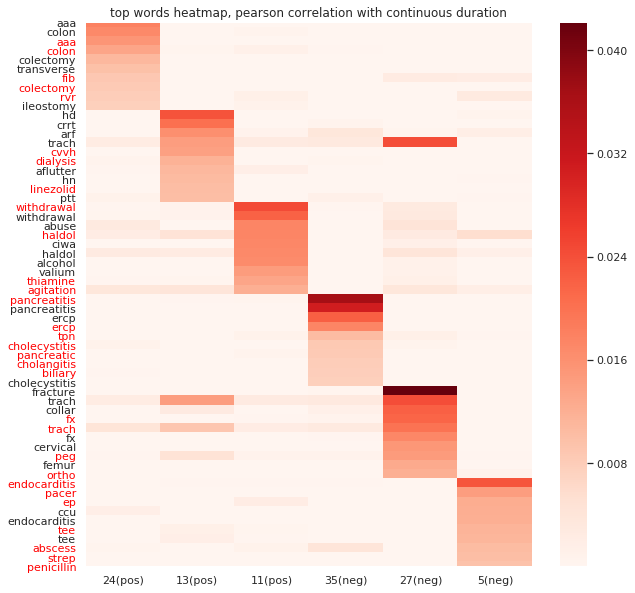

In [169]:
plt.figure(figsize=(10,10))
sns.heatmap(word_topic_matrix.iloc[:, 2:], yticklabels=yticklabels, xticklabels=xticklabels, cmap='Reds')
ax = plt.gca()
for idx in range(len(ax.get_yticklabels())):
    if top_types[idx] == 1:
        ax.get_yticklabels()[idx].set_color("red")
plt.title('top words heatmap, pearson correlation with continuous duration')

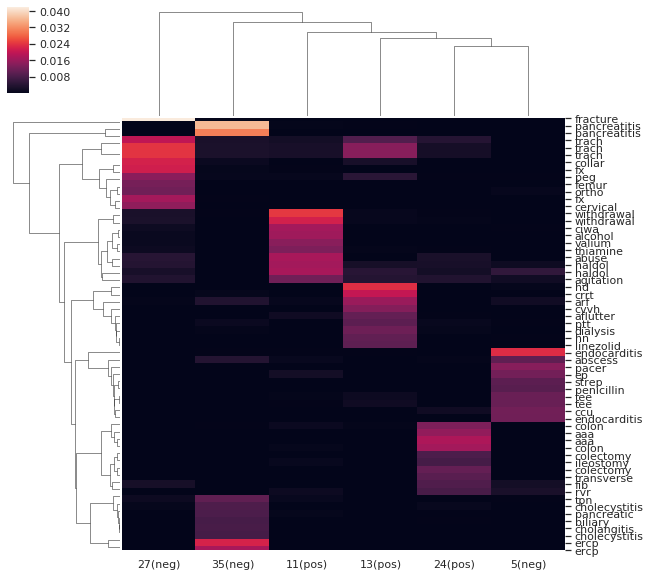

In [116]:
sns.set()
sns.clustermap(word_topic_matrix.iloc[:, 2:], yticklabels=yticklabels, xticklabels=xticklabels)

### Output entire heatmap

In [43]:
entire_top_words_bytopic = [phis_df.sort_values(by=str(topic), ascending=False)['WORD_ID'][0:25] for topic in range(50)]
entire_top_words = []
for sublist in entire_top_words_bytopic:
    for word in sublist:
        entire_top_words.append(word)

In [44]:
entire_word_topic_matrix = phis_df.iloc[[word_id for word_id in entire_top_words]]

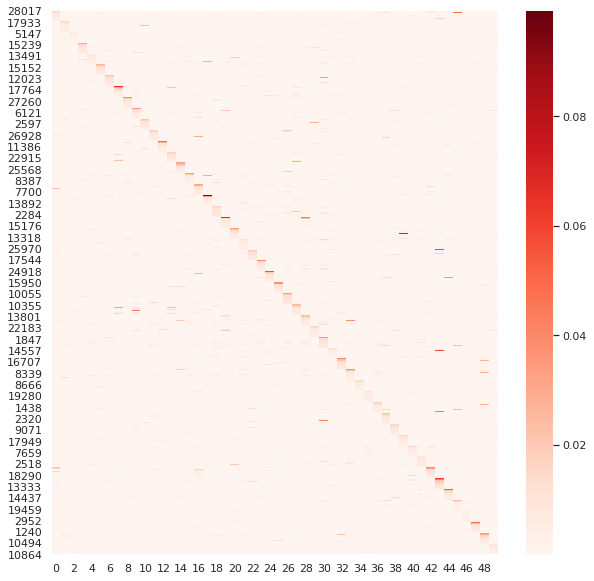

In [45]:
plt.figure(figsize=(10,10))
sns.heatmap(entire_word_topic_matrix.iloc[:, 2:], cmap='Reds')

## Binary duration
Threshold at 7 day

In [117]:
binary_duration = (duration > 7 * 24).astype(int)

In [118]:
bi_corr = normed_mixtures.apply(lambda mixture: mixture.corr(binary_duration, method='pearson'))

In [119]:
bi_corr_sorted = bi_corr.sort_values(ascending=False)

Text(0, 0.5, 'Pearson Correlation')

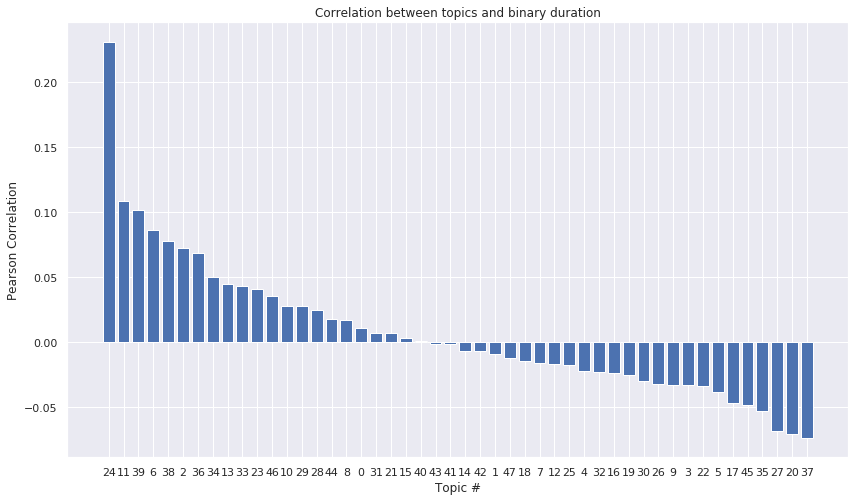

In [120]:
plt.figure(figsize=(14,8))
plt.bar(x=range(len(bi_corr)), height=bi_corr_sorted)
plt.title('Correlation between topics and binary duration')
plt.xlabel('Topic #')
plt.xticks(range(len(bi_corr)), bi_corr_sorted.index)
plt.ylabel('Pearson Correlation')

## Select most correlated topics and map back to words

In [121]:
bi_top_topics = find_max_n(list(np.abs(bi_corr)), 6)

In [122]:
bi_top_pos = find_max_n(list(bi_corr), 3)
bi_top_neg = find_max_n(list(-bi_corr), 3)

In [123]:
bi_top_topics = bi_top_pos + bi_top_neg
bi_top_topics

[24, 11, 39, 37, 20, 27]

## Extract top words in those top topics

In [125]:
bi_cols = ['CATEGORY', 'WORD_ID'] + [str(value) for value in bi_top_topics]

In [126]:
bi_top_phis_df = phis_df[bi_cols]

In [127]:
bi_top_phis_df.head()

,CATEGORY,WORD_ID,24,11,39,37,20,27
0,1,0,7.167470e-07,4.513580e-07,2.592110e-05,9.332180e-07,3.720530e-06,2.263750e-04
1,1,1,1.530840e-02,1.101740e-07,9.042560e-05,1.121020e-07,7.177020e-08,1.050300e-07
2,1,2,1.277730e-07,7.875830e-08,8.425770e-08,7.271040e-08,4.898890e-08,8.004600e-08
3,1,3,7.348560e-07,5.308460e-05,4.032230e-07,7.717900e-05,3.994110e-05,1.851860e-07
4,1,4,2.569090e-05,3.525730e-07,2.922930e-07,1.655290e-04,6.647740e-05,3.106920e-07


In [128]:
bi_top_words_bytopic = [bi_top_phis_df.sort_values(by=str(topic), ascending=False)['WORD_ID'][0:10] for topic in bi_top_topics]
bi_top_words = []
for sublist in bi_top_words_bytopic:
    for word in sublist:
        bi_top_words.append(word)
bi_top_types_bytopic = [bi_top_phis_df.sort_values(by=str(topic), ascending=False)['CATEGORY'][0:10] for topic in bi_top_topics]
bi_top_types = []
for sublist in bi_top_types_bytopic:
    for cat in sublist:
        bi_top_types.append(cat)

In [130]:
bi_word_topic_matrix = pd.DataFrame(columns=bi_top_phis_df.keys())
for idx in range(len(bi_top_types)):
    cat = bi_top_types[idx]
    word_id = bi_top_words[idx]
    bi_word_topic_matrix = pd.concat([bi_word_topic_matrix, bi_top_phis_df[(bi_top_phis_df['CATEGORY'] == cat) & \
                                                                           (bi_top_phis_df['WORD_ID'] == word_id)]], ignore_index=True)

In [131]:
bi_word_topic_matrix.head()

,CATEGORY,WORD_ID,24,11,39,37,20,27
0,2,1,0.017961,1.129080e-07,1.263440e-07,1.520400e-07,7.089130e-08,1.160300e-07
1,2,1669,0.017030,6.367140e-04,4.905670e-07,1.398470e-03,2.793970e-05,3.673830e-07
2,1,1,0.015308,1.101740e-07,9.042560e-05,1.121020e-07,7.177020e-08,1.050300e-07
3,1,1981,0.013406,1.245900e-03,4.975390e-07,4.047970e-03,2.910790e-06,4.529640e-05
4,2,1653,0.010992,1.324230e-07,1.564870e-07,1.795260e-07,9.030900e-08,1.381090e-07


In [133]:
bi_yticklabels = []
for idx, word_id in enumerate(bi_top_words):
    vocab_df = vocab_dfs[bi_top_types[idx]]
    bi_yticklabels.append(vocab_df[vocab_df['WORD_ID'] == word_id]['WORD'].values[0])
bi_xticklabels = [str(topic) + '(pos)' for topic in bi_top_topics[0:3]] + [str(topic) + '(neg)' for topic in bi_top_topics[3:]]

Text(0.5, 1, 'top words heatmap, pearson correlation with binarized duration')

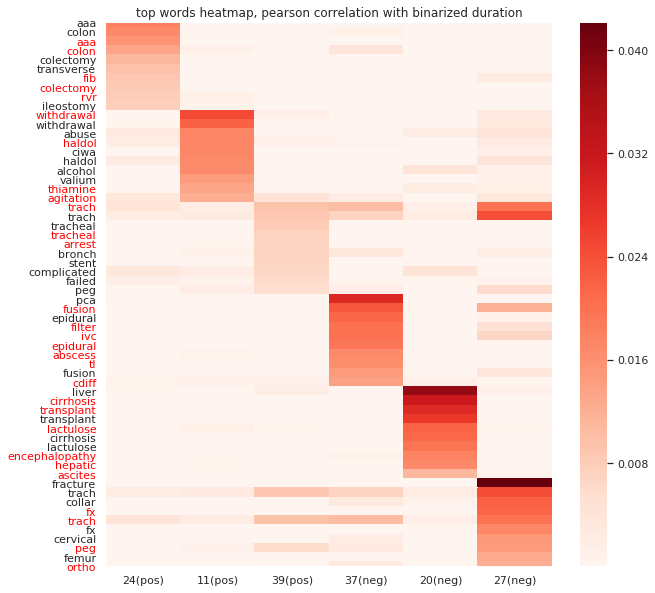

In [135]:
plt.figure(figsize=(10,10))
sns.heatmap(bi_word_topic_matrix.iloc[:, 2:], yticklabels=bi_yticklabels, xticklabels=bi_xticklabels, cmap='Reds')
ax = plt.gca()
for idx in range(len(ax.get_yticklabels())):
    if bi_top_types[idx] == 1:
        ax.get_yticklabels()[idx].set_color("red")
plt.title('top words heatmap, pearson correlation with binarized duration')

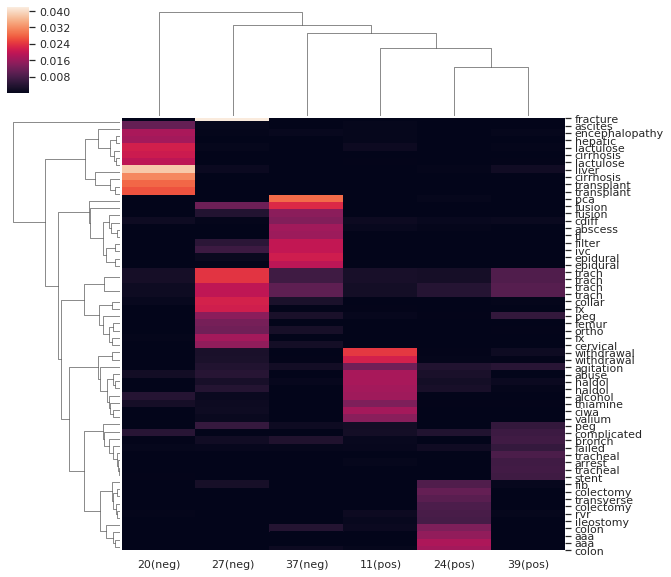

In [136]:
sns.set()
sns.clustermap(bi_word_topic_matrix.iloc[:, 2:], yticklabels=bi_yticklabels, xticklabels=bi_xticklabels)

## Try using cosine similarity instead of Pearson correlation
Because the correlation might not be linear

In [137]:
def cosine(series_1, series_2):
    return np.dot(series_1, series_2) / (np.linalg.norm(series_1, ord=2) * np.linalg.norm(series_2, ord=2))

In [138]:
cos = normed_mixtures.corrwith(duration, method=cosine)

In [139]:
cos.shape

(48,)

In [140]:
duration.shape

(1233,)

In [141]:
cos_sorted = cos.sort_values(ascending=False)

Text(0, 0.5, 'Cosine Similarity')

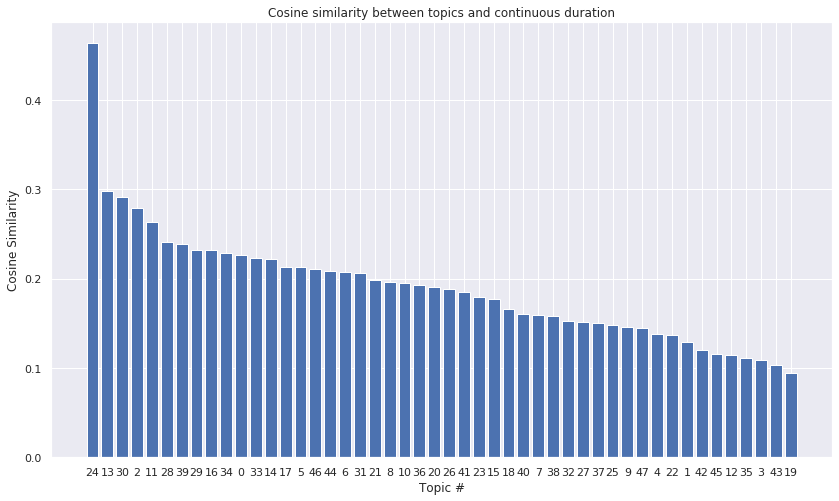

In [142]:
plt.figure(figsize=(14, 8))
plt.bar(x=range(len(cos_sorted)), height=cos_sorted)
plt.title('Cosine similarity between topics and continuous duration')
plt.xlabel('Topic #')
plt.xticks(range(len(cos_sorted)), cos_sorted.index)
plt.ylabel('Cosine Similarity')

## Select most correlated topics and map back to words

In [143]:
def find_max_n(numbers, n=3):
    sorted_numbers = sorted(numbers, reverse=True)
    return [numbers.index(number) for number in sorted_numbers[0:n]]

In [144]:
cos_top_topics = find_max_n(list(cos), 6)

## Extract top words in those top topics

In [146]:
cos_cols = ['CATEGORY', 'WORD_ID'] + [str(value) for value in cos_top_topics]

In [147]:
cos_top_phis_df = phis_df[cos_cols]

In [148]:
cos_top_phis_df.head()

,CATEGORY,WORD_ID,24,13,30,2,11,28
0,1,0,7.167470e-07,2.474340e-07,3.553910e-04,1.747330e-04,4.513580e-07,8.535590e-08
1,1,1,1.530840e-02,1.027470e-07,1.085390e-07,1.063910e-07,1.101740e-07,3.615620e-08
2,1,2,1.277730e-07,7.197090e-08,1.035690e-05,7.092210e-08,7.875830e-08,2.443780e-08
3,1,3,7.348560e-07,1.889340e-07,2.787870e-07,2.712690e-07,5.308460e-05,6.496530e-08
4,1,4,2.569090e-05,2.098620e-07,5.501790e-05,8.275680e-07,3.525730e-07,7.315840e-08


In [149]:
cos_top_words_bytopic = [cos_top_phis_df.sort_values(by=str(topic), ascending=False)['WORD_ID'][0:10] for topic in cos_top_topics]
cos_top_words = []
for sublist in cos_top_words_bytopic:
    for word in sublist:
        cos_top_words.append(word)
cos_top_types_bytopic = [cos_top_phis_df.sort_values(by=str(topic), ascending=False)['CATEGORY'][0:10] for topic in cos_top_topics]
cos_top_types = []
for sublist in cos_top_types_bytopic:
    for cat in sublist:
        cos_top_types.append(cat)

In [150]:
cos_word_topic_matrix = pd.DataFrame(columns=cos_top_phis_df.keys())
for idx in range(len(cos_top_types)):
    cat = cos_top_types[idx]
    word_id = cos_top_words[idx]
    cos_word_topic_matrix = pd.concat([cos_word_topic_matrix, cos_top_phis_df[(cos_top_phis_df['CATEGORY'] == cat) & \
                                                                           (cos_top_phis_df['WORD_ID'] == word_id)]], ignore_index=True)

In [151]:
cos_word_topic_matrix.head()

,CATEGORY,WORD_ID,24,13,30,2,11,28
0,2,1,0.017961,1.149290e-07,1.136860e-07,1.036140e-07,1.129080e-07,5.555010e-08
1,2,1669,0.017030,3.961930e-07,3.659830e-05,1.068590e-05,6.367140e-04,1.625420e-07
2,1,1,0.015308,1.027470e-07,1.085390e-07,1.063910e-07,1.101740e-07,3.615620e-08
3,1,1981,0.013406,3.675820e-04,1.452580e-04,5.385930e-04,1.245900e-03,1.470360e-04
4,2,1653,0.010992,1.403940e-07,1.486250e-07,3.071530e-05,1.324230e-07,6.620810e-08


In [152]:
cos_yticklabels = []
for idx, word_id in enumerate(cos_top_words):
    vocab_df = vocab_dfs[cos_top_types[idx]]
    cos_yticklabels.append(vocab_df[vocab_df['WORD_ID'] == word_id]['WORD'].values[0])
cos_xticklabels = [str(topic) for topic in cos_top_topics]

Text(0.5, 1, 'top words heatmap, cosine similarity with continuous duration')

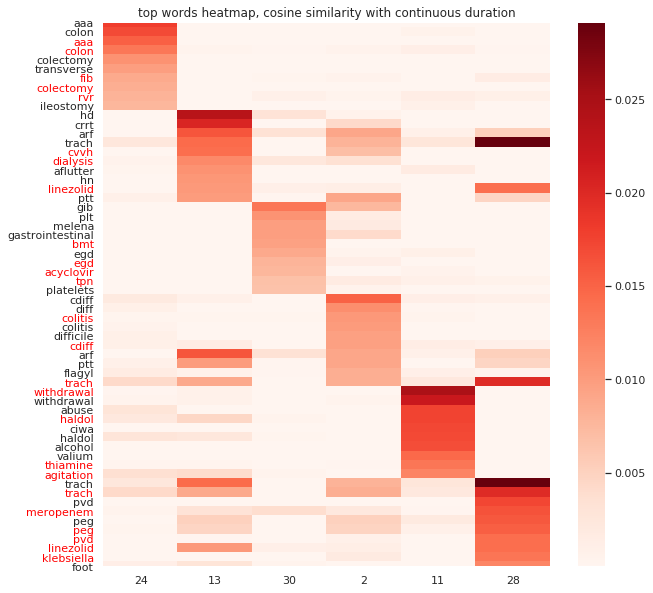

In [153]:
plt.figure(figsize=(10,10))
sns.heatmap(cos_word_topic_matrix.iloc[:, 2:], yticklabels=cos_yticklabels, xticklabels=cos_xticklabels, cmap='Reds')
ax = plt.gca()
for idx in range(len(ax.get_yticklabels())):
    if cos_top_types[idx] == 1:
        ax.get_yticklabels()[idx].set_color("red")
plt.title('top words heatmap, cosine similarity with continuous duration')

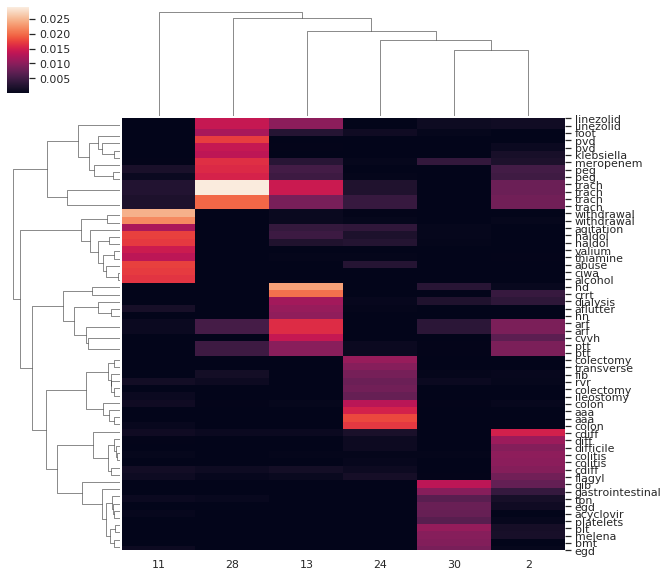

In [154]:
sns.set()
sns.clustermap(cos_word_topic_matrix.iloc[:, 2:], yticklabels=cos_yticklabels, xticklabels=cos_xticklabels)

### Try binarized

In [156]:
bi_cos = normed_mixtures.apply(lambda mixture: mixture.corr(binary_duration, method=cosine))

In [157]:
bi_cos_sorted = bi_cos.sort_values(ascending=False)

Text(0, 0.5, 'Cosine Similarity')

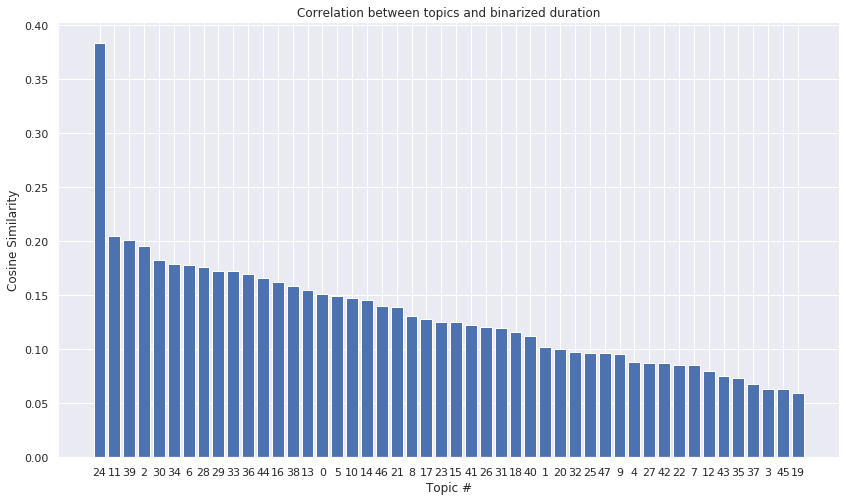

In [158]:
plt.figure(figsize=(14, 8))
plt.bar(x=range(len(bi_cos_sorted)), height=bi_cos_sorted)
plt.title('Correlation between topics and binarized duration')
plt.xlabel('Topic #')
plt.xticks(range(len(bi_cos_sorted)), bi_cos_sorted.index)
plt.ylabel('Cosine Similarity')

## Select most correlated topics and map back to words

In [159]:
bi_cos_top_topics = find_max_n(list(bi_cos), 6)

## Extract top words in those top topics

In [160]:
bi_cos_cols = ['CATEGORY', 'WORD_ID'] + [str(value) for value in bi_cos_top_topics]

In [161]:
bi_cos_top_phis_df = phis_df[bi_cos_cols]

In [162]:
bi_cos_top_phis_df.head()

,CATEGORY,WORD_ID,24,11,39,2,30,34
0,1,0,7.167470e-07,4.513580e-07,2.592110e-05,1.747330e-04,3.553910e-04,4.883240e-07
1,1,1,1.530840e-02,1.101740e-07,9.042560e-05,1.063910e-07,1.085390e-07,2.095130e-07
2,1,2,1.277730e-07,7.875830e-08,8.425770e-08,7.092210e-08,1.035690e-05,1.868540e-07
3,1,3,7.348560e-07,5.308460e-05,4.032230e-07,2.712690e-07,2.787870e-07,4.037250e-07
4,1,4,2.569090e-05,3.525730e-07,2.922930e-07,8.275680e-07,5.501790e-05,5.560810e-07


In [163]:
bi_cos_top_words_bytopic = [bi_cos_top_phis_df.sort_values(by=str(topic), ascending=False)['WORD_ID'][0:10] for topic in bi_cos_top_topics]
bi_cos_top_words = []
for sublist in bi_cos_top_words_bytopic:
    for word in sublist:
        bi_cos_top_words.append(word)
bi_cos_top_types_bytopic = [bi_cos_top_phis_df.sort_values(by=str(topic), ascending=False)['CATEGORY'][0:10] for topic in bi_cos_top_topics]
bi_cos_top_types = []
for sublist in bi_cos_top_types_bytopic:
    for cat in sublist:
        bi_cos_top_types.append(cat)

In [164]:
bi_cos_word_topic_matrix = pd.DataFrame(columns=bi_cos_top_phis_df.keys())
for idx in range(len(bi_cos_top_types)):
    cat = bi_cos_top_types[idx]
    word_id = bi_cos_top_words[idx]
    bi_cos_word_topic_matrix = pd.concat([bi_cos_word_topic_matrix, bi_cos_top_phis_df[(bi_cos_top_phis_df['CATEGORY'] == cat) & \
                                                                           (bi_cos_top_phis_df['WORD_ID'] == word_id)]], ignore_index=True)

In [165]:
bi_cos_word_topic_matrix.head()

,CATEGORY,WORD_ID,24,11,39,2,30,34
0,2,1,0.017961,1.129080e-07,1.263440e-07,1.036140e-07,1.136860e-07,3.306630e-07
1,2,1669,0.017030,6.367140e-04,4.905670e-07,1.068590e-05,3.659830e-05,1.066380e-06
2,1,1,0.015308,1.101740e-07,9.042560e-05,1.063910e-07,1.085390e-07,2.095130e-07
3,1,1981,0.013406,1.245900e-03,4.975390e-07,5.385930e-04,1.452580e-04,7.238710e-07
4,2,1653,0.010992,1.324230e-07,1.564870e-07,3.071530e-05,1.486250e-07,2.758830e-07


In [166]:
bi_cos_yticklabels = []
for idx, word_id in enumerate(bi_cos_top_words):
    vocab_df = vocab_dfs[bi_cos_top_types[idx]]
    bi_cos_yticklabels.append(vocab_df[vocab_df['WORD_ID'] == word_id]['WORD'].values[0])
bi_cos_xticklabels = [str(topic) for topic in bi_cos_top_topics]

Text(0.5, 1, 'top words heatmap, cosine similarity with binarized duration')

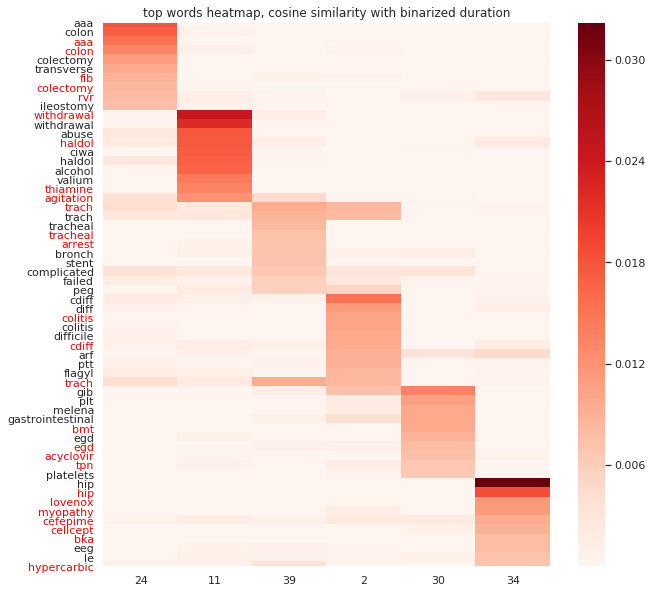

In [167]:
plt.figure(figsize=(10,10))
sns.heatmap(bi_cos_word_topic_matrix.iloc[:, 2:], yticklabels=bi_cos_yticklabels, xticklabels=bi_cos_xticklabels, cmap='Reds')
ax = plt.gca()
for idx in range(len(ax.get_yticklabels())):
    if bi_cos_top_types[idx] == 1:
        ax.get_yticklabels()[idx].set_color("red")
plt.title('top words heatmap, cosine similarity with binarized duration')

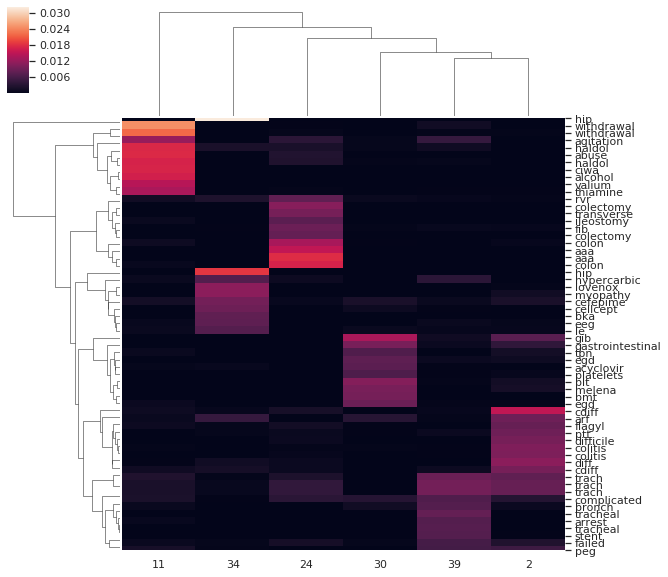

In [168]:
sns.set()
sns.clustermap(bi_cos_word_topic_matrix.iloc[:, 2:], yticklabels=bi_cos_yticklabels, xticklabels=bi_cos_xticklabels)